# Data Exploration

In [30]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from random import randint
import pandas as pd
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline


DATA_PATH = '../data/'


def show_image(img_path, title='', cmap=None):
    plt.figure()
    plt.tick_params(
        axis='both', 
        which='both', 
        bottom='off', 
        top='off', 
        labelbottom='off', 
        right='off', 
        left='off', 
        labelleft='off')
    plt.title(title, loc='left')
    plt.imshow(mpimg.imread(img_path), cmap)

In [31]:
df = pd.read_csv(DATA_PATH + 'driving_log.csv')
df.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123025048>]], dtype=object)

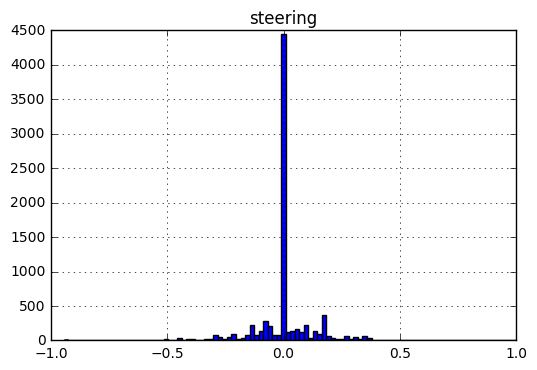

In [32]:
df.hist(column='steering', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121aa5a90>]], dtype=object)

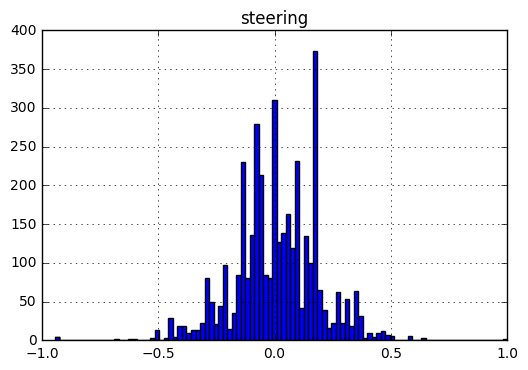

In [33]:
# remove about 95% of rows with steering 0.0 to remove bias for going straight
rows_with_steering_zero = df[(df.steering == 0)]
total_rows_with_steering_zero = len(rows_with_steering_zero)
drop_indices = np.random.choice(rows_with_steering_zero.index, int(total_rows_with_steering_zero * 0.95), replace=False)
df_subset = df.drop(drop_indices)
df_subset.hist(column='steering', bins=100)

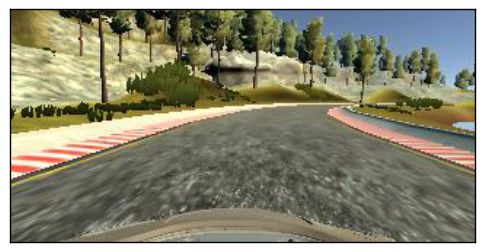

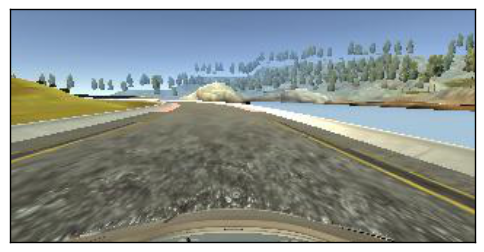

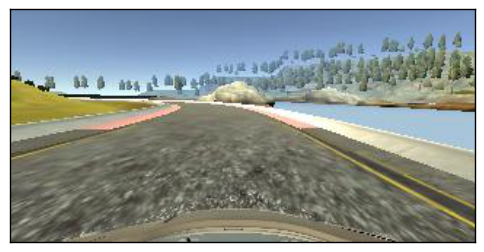

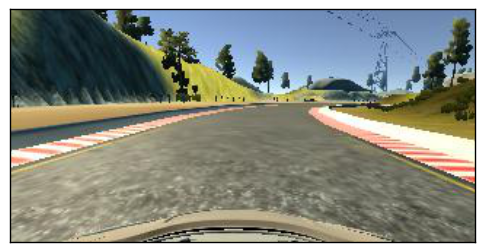

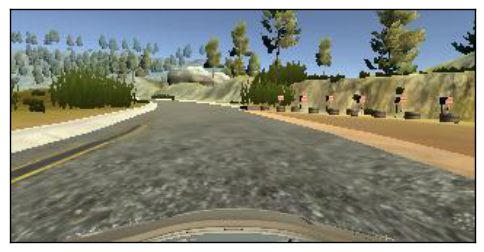

In [35]:
for _, row in df_subset.sample(5).iterrows():
    show_image(DATA_PATH + row.center)

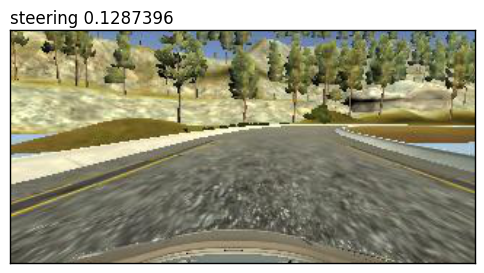

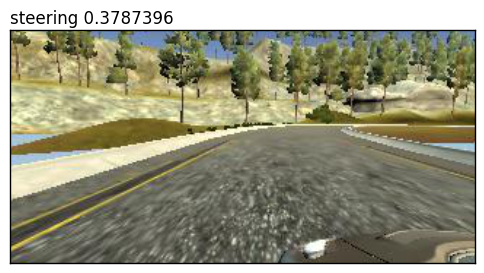

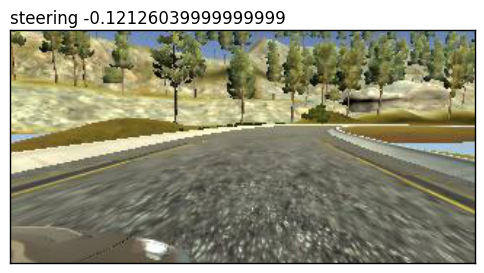

In [36]:
row = df_subset.iloc[100]

show_image(DATA_PATH + row.center.strip(), 'steering {}'.format(row.steering))

# if using left camera image, add .25 to angle to simulate turning back to center
show_image(DATA_PATH + row.left.strip(), 'steering {}'.format(row.steering + .25))

# fi using right camera image, subtract .25 to angle to simulate turning back to center
show_image(DATA_PATH + row.right.strip(), 'steering {}'.format(row.steering - .25))

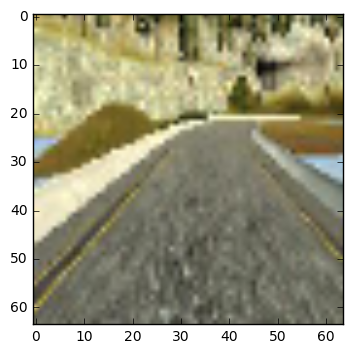

In [38]:
# reduce size to 64 x 32
# crop bottom to remove hood of car
# crop top to remove horizon
image = cv2.imread(DATA_PATH + row.center.strip())
image = image[32:132]
resized_image = cv2.resize(image, (64, 64))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

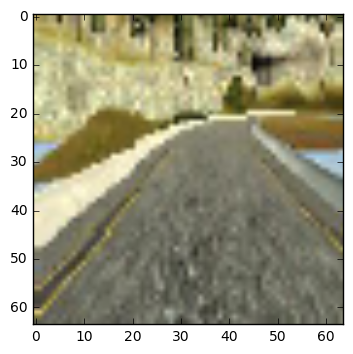

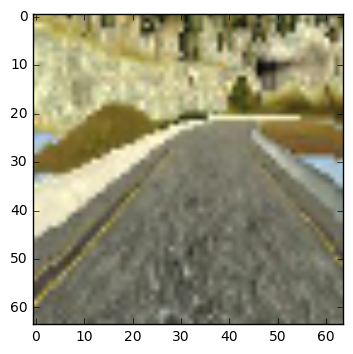

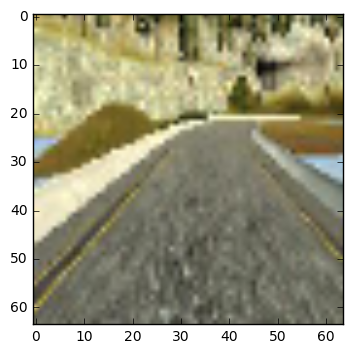

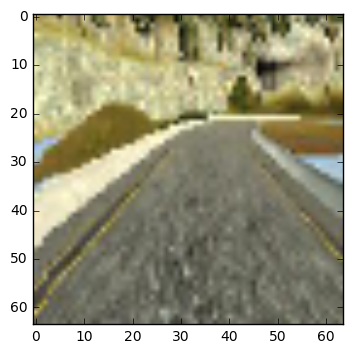

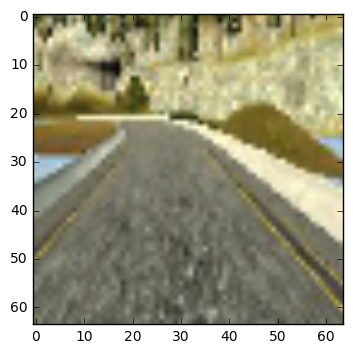

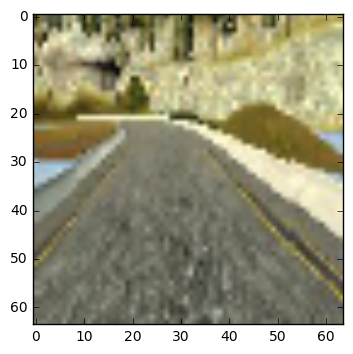

In [39]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=5, horizontal_flip=True)
image = cv2.cvtColor(cv2.imread(DATA_PATH + row.center.strip()), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image[32:132], (64, 64)) # crop horizon of top and hood of car on bottom and resize
x = img_to_array(resized_image)  # this is a Numpy array with shape (3, 64, 64)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 64, 64)

# the .flow() command below generates batches of randomly transformed images
i = 0
for batch in datagen.flow(x, batch_size=1):
    batch_image = batch.reshape(batch.shape[1:]) 
    plt.figure()
    plt.imshow(batch_image)
    i += 1
    if i > 5:
        break  # otherwise the generator would loop indefinitely